* PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

* Loaded the dataset for Forestfire
* There are 517 observations and 31 features
* Deleted the month and day columns as we have one hot encode values for them in the table
* Now there are 517 observations and 29 features
* Did initial analysis on the data. There were no null values.
* Converted the target column 'size_category' into binary class using LabelEncoder
* Predictor variables = 28 input features = 'FFMC' to 'monthsep' 
* Target variable     = 1 feature = 'size_category'
* Splitted the data using train_test_split into x_train, x_test and so on
* Standardized the x_train and x_test only Predictor variables
* Using ANN build and trained the model
* Optimized the ANN model by finding best batch size and epochs no.
* Created a table of test data with
*    1. Predictor Variables
*    2. Target Variable
*    3. Predicted Probability test data 
*    4. Binary classificaton for predicted probability

* Calculated Accuracy, confusion matrix and classification report of Test data   

* size_category = target variable
        small area = 1 -- fire in small area -- Not Burned Area 
        Large area = 0 -- fire in large area -- Burned Area
        
* From confusion matrix 2 points are misclassified while predicting for burned area.
* Hence, accuracy is 98%

In [83]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [84]:
ds = pd.read_csv('forestfires.csv')
ds

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [85]:
ds.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

<AxesSubplot:xlabel='size_category', ylabel='count'>

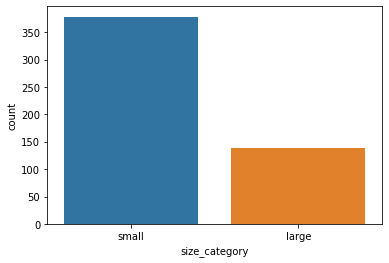

In [86]:
sns.countplot(ds['size_category'])

In [87]:
ds['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [88]:
print(ds.shape)
print(ds.dtypes)
print(ds.isnull().sum())

(517, 31)
month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object
month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area       

In [89]:
ds.drop(['month', 'day'], axis=1, inplace=True)

In [90]:
ds

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [91]:
le = LabelEncoder()
ds['size_category'] = le.fit_transform(ds['size_category'])

In [92]:
ds

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:xlabel='size_category', ylabel='count'>

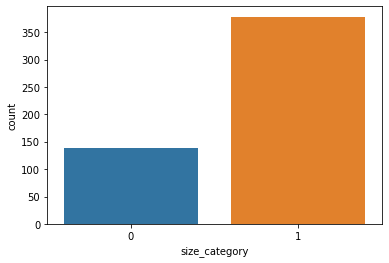

In [93]:
sns.countplot(ds['size_category'])
# small = 1, 
# large = 0

In [94]:
ds.describe(include='all')

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689,0.731141
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632,0.443796
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
x = ds.iloc[:,:-1]
y = ds[['size_category']]
print(y)
x

     size_category
0                1
1                1
2                1
3                1
4                1
..             ...
512              0
513              0
514              0
515              1
516              1

[517 rows x 1 columns]


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


## Data Preprocessing

In [96]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 42, stratify = y)
print(x_train.shape)
print(x_test.shape)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) # scaling train data
x_test_scaled  = scaler.fit_transform(x_test) # scaling test data
print(x_test)
print(x_test_scaled)

(413, 28)
(104, 28)
     FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  ...  \
341  91.9  111.7  770.3   6.5  15.7  51   2.2   0.0   0.00       0  ...   
43   92.5   88.0  698.6   7.1  19.6  48   2.7   0.0   0.00       0  ...   
219  90.1   39.7   86.6   6.2  15.2  27   3.1   0.0  31.86       0  ...   
413  93.7  231.1  715.1   8.4  26.4  33   3.6   0.0   0.00       0  ...   
35   90.3   80.7  730.2   6.3  18.2  62   4.5   0.0   0.00       0  ...   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...  ...   
446  92.0  203.2  664.5   8.1  19.1  70   2.2   0.0   0.00       0  ...   
318  92.8  119.0  783.5   7.5  21.6  27   2.2   0.0   0.00       0  ...   
41   90.2   96.9  624.2   8.9  18.4  42   6.7   0.0   0.00       0  ...   
256  94.2  117.2  581.1  11.0  23.9  41   2.2   0.0   8.02       0  ...   
44   90.1   82.9  735.7   6.2  12.9  74   4.9   0.0   0.00       0  ...   

     monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
34

## Model Building & Training

In [97]:
model = Sequential()
model.add(Dense(units = 50, input_dim = 28, activation = 'tanh', kernel_initializer = 'normal'))# input layer
model.add(Dense(units = 6, activation = 'tanh', kernel_initializer = 'normal'))# hidden layer
model.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'normal')) # o/p layer

In [98]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 50)                1450      
_________________________________________________________________
dense_106 (Dense)            (None, 6)                 306       
_________________________________________________________________
dense_107 (Dense)            (None, 1)                 7         
Total params: 1,763
Trainable params: 1,763
Non-trainable params: 0
_________________________________________________________________


In [99]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['Accuracy'])

In [100]:
model.fit(x_train_scaled, y_train, batch_size = 50, epochs = 100)

Epoch 1/100
9/9 [==============================] - 0s 1ms/step - loss: 0.6919 - Accuracy: 0.5714
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.6869 - Accuracy: 0.7409
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.6814 - Accuracy: 0.7627
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.6737 - Accuracy: 0.7676
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.6633 - Accuracy: 0.7700
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.6493 - Accuracy: 0.7772
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.6313 - Accuracy: 0.7821
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.6078 - Accuracy: 0.7845
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5856 - Accuracy: 0.7869
Epoch 10/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5622 - Accuracy: 0.7869
Epoch 11/100
9/9 [===========

### Finding Best Params - batch size & epochs 

In [101]:
def toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test):
    #print(y_test.shape)
    #sys.exit()
    
    #defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]
           
    # initializing the trials
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train_scaled.shape[1], kernel_initializer='normal', activation='tanh'))
            
            # Defining the Second layer of the model
            model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
 
            # Compiling the model
            model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])
 
            # Fitting the ANN to the Training set
            model_trained = model.fit(x_train_scaled, y_train ,batch_size = batch_trial, epochs = epochs_trial, verbose=0)
               
             # Fetching the accuracy of the training
            Accuracy_train = model_trained.history['accuracy'][-1]   
            
            # printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',Accuracy_train)

# Calling the function
toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test)

batch_size: 5 - epochs: 5 Accuracy: 0.8280871510505676
batch_size: 5 - epochs: 10 Accuracy: 0.9176755547523499
batch_size: 5 - epochs: 50 Accuracy: 0.9782082438468933
batch_size: 5 - epochs: 100 Accuracy: 0.990314781665802
batch_size: 10 - epochs: 5 Accuracy: 0.7869249582290649
batch_size: 10 - epochs: 10 Accuracy: 0.8668280839920044
batch_size: 10 - epochs: 50 Accuracy: 0.9878934621810913
batch_size: 10 - epochs: 100 Accuracy: 0.9951573610305786
batch_size: 15 - epochs: 5 Accuracy: 0.7820823192596436
batch_size: 15 - epochs: 10 Accuracy: 0.8280871510505676
batch_size: 15 - epochs: 50 Accuracy: 0.990314781665802
batch_size: 15 - epochs: 100 Accuracy: 0.9951573610305786
batch_size: 20 - epochs: 5 Accuracy: 0.7820823192596436
batch_size: 20 - epochs: 10 Accuracy: 0.8038740754127502
batch_size: 20 - epochs: 50 Accuracy: 0.9830508232116699
batch_size: 20 - epochs: 100 Accuracy: 0.9951573610305786


## Optimizing Model - Best Params

In [102]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['Accuracy'])

# Training the model with best parameters
model.fit(x_train_scaled, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
42/42 [==============================] - 0s 863us/step - loss: 0.0915 - Accuracy: 0.9709
Epoch 2/100
42/42 [==============================] - 0s 856us/step - loss: 0.0900 - Accuracy: 0.9709
Epoch 3/100
42/42 [==============================] - 0s 950us/step - loss: 0.0867 - Accuracy: 0.9758
Epoch 4/100
42/42 [==============================] - 0s 918us/step - loss: 0.0845 - Accuracy: 0.9734
Epoch 5/100
42/42 [==============================] - 0s 932us/step - loss: 0.0833 - Accuracy: 0.9782
Epoch 6/100
42/42 [==============================] - 0s 926us/step - loss: 0.0756 - Accuracy: 0.9831
Epoch 7/100
42/42 [==============================] - 0s 880us/step - loss: 0.0740 - Accuracy: 0.9806
Epoch 8/100
42/42 [==============================] - 0s 877us/step - loss: 0.0743 - Accuracy: 0.9855
Epoch 9/100
42/42 [==============================] - 0s 951us/step - loss: 0.0746 - Accuracy: 0.9806
Epoch 10/100
42/42 [==============================] - 0s 829us/step - loss: 0.0672 - Accura

Epoch 81/100
42/42 [==============================] - 0s 877us/step - loss: 0.0514 - Accuracy: 0.9855
Epoch 82/100
42/42 [==============================] - 0s 877us/step - loss: 0.0605 - Accuracy: 0.9855
Epoch 83/100
42/42 [==============================] - 0s 804us/step - loss: 0.0530 - Accuracy: 0.9903
Epoch 84/100
42/42 [==============================] - 0s 853us/step - loss: 0.0586 - Accuracy: 0.9831
Epoch 85/100
42/42 [==============================] - 0s 853us/step - loss: 0.0490 - Accuracy: 0.9879
Epoch 86/100
42/42 [==============================] - 0s 853us/step - loss: 0.0510 - Accuracy: 0.9831
Epoch 87/100
42/42 [==============================] - 0s 853us/step - loss: 0.0574 - Accuracy: 0.9831
Epoch 88/100
42/42 [==============================] - 0s 853us/step - loss: 0.0624 - Accuracy: 0.9831
Epoch 89/100
42/42 [==============================] - 0s 853us/step - loss: 0.0502 - Accuracy: 0.9879
Epoch 90/100
42/42 [==============================] - 0s 853us/step - loss: 0.0457

In [103]:
#checking model accuracy for model testing
y_predict = model.predict(x_test_scaled)
#y_predict

# table in i/p params, target variable, probabity of target, binary o/p of test data 
final_table   = pd.DataFrame(x_test) # test data i/p variables
final_table['burned_area'] = y_test  # test data binary class target variable
final_table['predicted_burned_prob'] = y_predict # test data probability of target variable

def probToBinary(varProb):
    if varProb >= 0.5:
        return 1
    else:
        return 0

# converting the probability of target variable to binary class of test data
final_table['pred_burn_area'] = final_table['predicted_burned_prob'].apply(probToBinary)
final_table

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,burned_area,predicted_burned_prob,pred_burn_area
341,91.9,111.7,770.3,6.5,15.7,51,2.2,0.0,0.00,0,...,0,0,0,0,0,0,1,1,0.996626,1
43,92.5,88.0,698.6,7.1,19.6,48,2.7,0.0,0.00,0,...,0,0,0,0,0,0,1,1,0.996626,1
219,90.1,39.7,86.6,6.2,15.2,27,3.1,0.0,31.86,0,...,0,0,1,0,0,0,0,0,0.002584,0
413,93.7,231.1,715.1,8.4,26.4,33,3.6,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0.996626,1
35,90.3,80.7,730.2,6.3,18.2,62,4.5,0.0,0.00,0,...,0,0,0,0,0,0,1,1,0.996626,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,92.0,203.2,664.5,8.1,19.1,70,2.2,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0.996626,1
318,92.8,119.0,783.5,7.5,21.6,27,2.2,0.0,0.00,0,...,0,0,0,0,0,0,1,1,0.996626,1
41,90.2,96.9,624.2,8.9,18.4,42,6.7,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0.996626,1
256,94.2,117.2,581.1,11.0,23.9,41,2.2,0.0,8.02,0,...,0,0,0,0,0,0,0,0,0.002603,0


In [104]:
final_table['burned_area'].value_counts()

1    76
0    28
Name: burned_area, dtype: int64

In [105]:
final_table['pred_burn_area'].value_counts()

1    78
0    26
Name: pred_burn_area, dtype: int64

In [106]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy score for Test Data    = ", accuracy_score(final_table['burned_area'],final_table['pred_burn_area']))
print("Confusion Matrix for Test Data  =\n", confusion_matrix(final_table['burned_area'],final_table['pred_burn_area']))
print("Classification Report for Test Data  =\n", classification_report(final_table['burned_area'],final_table['pred_burn_area']))

Accuracy score for Test Data    =  0.9807692307692307
Confusion Matrix for Test Data  =
 [[26  2]
 [ 0 76]]
Classification Report for Test Data  =
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        28
           1       0.97      1.00      0.99        76

    accuracy                           0.98       104
   macro avg       0.99      0.96      0.97       104
weighted avg       0.98      0.98      0.98       104

